In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dfbusiness=pd.read_parquet(r'..\datasets\parquets\business.parquet')
categorias=pd.read_csv('..\datasets\csv\Y_beauty_categories.csv')

Se buscan datos nulos en el dataset

In [3]:
print('datos nulos business',dfbusiness.isna().sum())

datos nulos business business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


Se buscan filas duplicadas en el dataset

In [4]:
print('datos duplicados business',dfbusiness.drop(columns=['hours','attributes']).duplicated().sum())

datos duplicados business 0


Se checan tipos de dato de todas las columnas del dataset

In [5]:
dfbusiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


Se eliminan valores nulos de la columna categories

In [6]:
dfbusiness.dropna(subset='categories',inplace=True)

In [7]:
dfbusiness.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,None,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,None,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,None,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


Filtramos el dataset business con las categorias que seleccionamos

In [14]:
dfbusiness_filtrados=dfbusiness[dfbusiness.categories.str.contains('|'.join(categorias['Categoria']))].copy()

In [8]:
dfreviews=pd.read_parquet(r'..\datasets\parquets\reviews_yelp')

In [9]:
dfreviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Se checan datos nulos en las reviews

In [10]:
print('Datos nulos en reviews',dfreviews.isna().sum())

Datos nulos en reviews review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


Se checan datos ducplicados en reviews

In [11]:
print('Datos duplicados en reviews',dfreviews.duplicated().sum())

Datos duplicados en reviews 0


Se checan tipos de datos del dataset reviews

In [12]:
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype                
---  ------       -----                
 0   review_id    string               
 1   user_id      string               
 2   business_id  string               
 3   stars        double[pyarrow]      
 4   useful       int64[pyarrow]       
 5   funny        int64[pyarrow]       
 6   cool         int64[pyarrow]       
 7   text         string               
 8   date         timestamp[s][pyarrow]
dtypes: double[pyarrow](1), int64[pyarrow](3), string(4), timestamp[s][pyarrow](1)
memory usage: 484.2 MB


Se hace un merge de los negocios filtrados por el business_id, trayendo las columnas review_id, business_id_name

In [15]:
dfreviews_filtrados=dfreviews[['review_id', 'business_id']].merge(right=dfbusiness_filtrados[['business_id','name']],how='inner')
dfreviews_filtrados

,review_id,business_id,name
0,u2vzZaOqJ2feRshaaF1doQ,CLEWowfkj-wKYJlQDqT1aw,Blow Bar Express Styling Salon
1,RwHUth37oaXa7HEkUdfrKw,CLEWowfkj-wKYJlQDqT1aw,Blow Bar Express Styling Salon
2,4FhqOo4zqwxgA8fNQC3mGw,CLEWowfkj-wKYJlQDqT1aw,Blow Bar Express Styling Salon
3,hd0uao_OKbqeluoIvt2q3w,CLEWowfkj-wKYJlQDqT1aw,Blow Bar Express Styling Salon
4,ICfGBTBaiAv3ZCV5pVZf7Q,CLEWowfkj-wKYJlQDqT1aw,Blow Bar Express Styling Salon
...,...,...,...
374613,0gai4MzBzFCa7JsS31RRjg,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates
374614,7MZu6bFdFoqr7MyPKqvoew,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates
374615,3emHuLQvuAw0l66TzSWmKA,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates
374616,T-adPwD-eP2LvuDINKOA9g,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates


Agrupamos por el número de reviews de los negocios ya filtrados por categoría, y tomamos un top 100 para hacer un análisis de los negocios más representativos

In [16]:
dfreviews_top_100=dfreviews_filtrados.groupby(['name'])[['review_id']].count().sort_values(ascending=False,by='review_id').head(100)

In [17]:
dfreviews_top_100.head()

,review_id
name,
Walgreens,4136
European Wax Center,3484
Peppermill Reno,2715
Supercuts,2204
Great Clips,2055


Guardamos en un csv para tener un respaldo del trabajo

In [18]:
dfreviews_top_100.to_csv('../datasets/csv/Y_top_100_reviews.csv')

In [19]:
dfreviews_top_100_Google=pd.read_csv(r'..\datasets\csv\G_top_100_reviews.csv')

In [20]:
dfreviews_top_100_Google.head()

,name,num_of_reviews
0,Walgreens,143782
1,CVS,139903
2,Great Clips,124656
3,Supercuts,81474
4,Planet Fitness,60613


In [21]:
dftop25=dfreviews_top_100_Google.merge(right=dfreviews_top_100,how='inner',left_on='name',right_on='name').rename(columns={'num_of_reviews':'reviews_Google','review_id':'reviews_Yelp'})
dftop25.to_csv(r'..\datasets\csv\top_25_merge.csv',index=False)

In [22]:
dftop25

,name,reviews_Google,reviews_Yelp
0,Walgreens,143782,4136
1,Great Clips,124656,2055
2,Supercuts,81474,2204
3,Planet Fitness,60613,887
4,European Wax Center,41263,3484
5,Ulta Beauty,29522,2032
6,Bath & Body Works,29487,346
7,Hair Cuttery,25067,1114
8,Cost Cutters,22243,299
9,Amazing Lash Studio,18501,515


In [23]:
dfbusiness_filtrados.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
40,x1mhq4IpWctQOBM06dU8vg,Diamond Hair Company,5324 W 16th St,Indianapolis,DE,46224,39.787464,-86.251421,1.5,25,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hair Salons, Hair Extensions, Beauty & Spas, W...","{'Friday': '9:0-18:0', 'Monday': '9:0-18:0', '..."
43,Kq51_lGAgAigqmENITTr-A,Bala Better Health,"2 Bala Plz, Ste PL-11",Bala Cynwyd,IN,19004,40.006870,-75.217262,4.0,13,1,"{'AcceptsInsurance': 'False', 'AgesAllowed': N...","Health & Medical, Beauty & Spas, Laser Hair Re...","{'Friday': None, 'Monday': '0:0-0:0', 'Saturda..."


In [24]:
dfbusiness.is_open.value_counts()

is_open
1    119603
0     30640
Name: count, dtype: int64

In [25]:
dfbusiness_filtrados=dfbusiness_filtrados[['business_id', 'name', 'state','latitude','longitude','stars','review_count','is_open','attributes','categories','hours']]
dfbusiness_filtrados.head()

,business_id,name,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
40,x1mhq4IpWctQOBM06dU8vg,Diamond Hair Company,DE,39.787464,-86.251421,1.5,25,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hair Salons, Hair Extensions, Beauty & Spas, W...","{'Friday': '9:0-18:0', 'Monday': '9:0-18:0', '..."
43,Kq51_lGAgAigqmENITTr-A,Bala Better Health,IN,40.006870,-75.217262,4.0,13,1,"{'AcceptsInsurance': 'False', 'AgesAllowed': N...","Health & Medical, Beauty & Spas, Laser Hair Re...","{'Friday': None, 'Monday': '0:0-0:0', 'Saturda..."
74,9Rww8yE6Dm4dSMEq09nwXg,Holly Nails & Spa,TN,27.855347,-82.736308,4.5,16,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Health & Medical, Personal Care Services, Beau...","{'Friday': '9:30-19:0', 'Monday': None, 'Satur..."
123,iPSPcprSnkLOuL1Ns8UZZA,Pete's Barber Shop,CA,39.974880,-75.183262,4.5,12,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Barbers, Beauty & Spas",None
156,t5tBd4p7BA7hNDitBUXxrw,Boise Therapeutic Massage Center,FL,43.611949,-116.271110,4.0,68,1,"{'AcceptsInsurance': 'True', 'AgesAllowed': No...","Massage, Health & Medical, Medical Spas, Beaut...","{'Friday': '9:0-21:0', 'Monday': '9:0-21:0', '..."


Se checa ulta beauty en google reviews

In [26]:
dfbusiness_filtrados_Ulta_Beauty=dfbusiness_filtrados[dfbusiness_filtrados['name']=='Ulta Beauty']
dfbusiness_filtrados_Ulta_Beauty

,business_id,name,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
883,4uqRhXZTOzKF2ZhxbWzxfA,Ulta Beauty,PA,39.672058,-75.648900,3.5,11,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shopping, Beauty & Spas, Cosmetics & Beauty Su...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
1063,fWMPbickerGWohPy2vDL5A,Ulta Beauty,AZ,39.713441,-86.357947,3.0,14,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Day Spas, Shopping, Skin Care, Hair Salons, Be...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
5488,DJZQCN0NUej_EtviN4rUlg,Ulta Beauty,PA,39.978981,-75.271460,3.5,12,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shopping, Skin Care, Cosmetics & Beauty Supply...","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', '..."
13384,Vxqa8u_5RD5e7oBqdaU0yQ,Ulta Beauty,AB,38.596645,-89.987348,3.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shopping, Beauty & Spas, Cosmetics & Beauty Su...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
13760,idP674ti6a8yg8z2xFcCgA,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
...,...,...,...,...,...,...,...,...,...,...,...
142763,DLV4zM60EdyPFafEk88crg,Ulta Beauty,AB,28.144713,-82.742482,3.0,14,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Skin Care...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
145144,THOXisAF58kiwXUv0h-w3g,Ulta Beauty,FL,39.869889,-74.921299,4.0,20,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hair Salons, Cosmetics & Beauty Supply, Shoppi...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
147917,652tRAf14Mu-2kzPKCeMbQ,Ulta Beauty,NV,29.940716,-90.095006,3.0,38,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hair Salons, Cosmetics & Beauty Supply, Beauty...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
149815,TuMQjYCumnFhWJV2ELwwxQ,Ulta Beauty,PA,39.529788,-119.866247,3.5,32,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Makeup Artists, Cosmetics & Beauty Supply, Hai...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."


In [27]:
len(dfbusiness_filtrados_Ulta_Beauty.state.unique())

14

In [28]:
dfreviews_ulta_beauty=dfreviews[dfreviews.business_id.isin(dfbusiness_filtrados_Ulta_Beauty.business_id)]
dfreviews_ulta_beauty.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
7336,pJ_lAu6WERodmeH9L6jTMQ,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,2,0,0,I recently bought $50 worth of hair products I...,2017-09-09 11:45:38
8097,UakWnaL9Gdmj0EkCB6bjYQ,gY_48U0zUoYDia92QYgLuA,Vxqa8u_5RD5e7oBqdaU0yQ,5.0,2,1,1,I went to the salon for a hair cut and Meghan ...,2015-02-02 16:26:01
23288,fVUcM-fvdly7zDVxu4AuIg,beJ9htIPXhUyz8_BEo5Few,fWMPbickerGWohPy2vDL5A,2.0,0,0,0,feeling like constantly watched and rushed is ...,2015-05-14 15:39:35
39530,K-U-mCXJSN30xYbT2sv_bA,e7QBhPDOWkkBFTi3_PINvA,fWMPbickerGWohPy2vDL5A,4.0,0,0,1,I went into the store today because I had a $5...,2018-02-14 03:05:21
47905,xYy6DVhLzwAYqRmkbw_bhQ,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,0,0,0,Based on other reviews I see I am not the only...,2018-06-11 16:15:38


In [29]:
dfreviews_ulta_beauty.loc[:,'año']=dfreviews_ulta_beauty.date.dt.year
dfreviews_ulta_beauty.head()

C:\Users\Grethel\AppData\Local\Temp\ipykernel_22072\3736183140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreviews_ulta_beauty.loc[:,'año']=dfreviews_ulta_beauty.date.dt.year


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,año
7336,pJ_lAu6WERodmeH9L6jTMQ,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,2,0,0,I recently bought $50 worth of hair products I...,2017-09-09 11:45:38,2017
8097,UakWnaL9Gdmj0EkCB6bjYQ,gY_48U0zUoYDia92QYgLuA,Vxqa8u_5RD5e7oBqdaU0yQ,5.0,2,1,1,I went to the salon for a hair cut and Meghan ...,2015-02-02 16:26:01,2015
23288,fVUcM-fvdly7zDVxu4AuIg,beJ9htIPXhUyz8_BEo5Few,fWMPbickerGWohPy2vDL5A,2.0,0,0,0,feeling like constantly watched and rushed is ...,2015-05-14 15:39:35,2015
39530,K-U-mCXJSN30xYbT2sv_bA,e7QBhPDOWkkBFTi3_PINvA,fWMPbickerGWohPy2vDL5A,4.0,0,0,1,I went into the store today because I had a $5...,2018-02-14 03:05:21,2018
47905,xYy6DVhLzwAYqRmkbw_bhQ,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,0,0,0,Based on other reviews I see I am not the only...,2018-06-11 16:15:38,2018


Merge del dataframe dfreviews_ulta_beauty y dfbusiness_filtrados_Ulta_Beauty

In [30]:
df_ulta_beauty = pd.merge(dfreviews_ulta_beauty, dfbusiness_filtrados_Ulta_Beauty, on='business_id', how='inner')

In [31]:
df_ulta_beauty.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,año,name,state,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,pJ_lAu6WERodmeH9L6jTMQ,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,2,0,0,I recently bought $50 worth of hair products I...,2017-09-09 11:45:38,2017,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
1,xYy6DVhLzwAYqRmkbw_bhQ,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,0,0,0,Based on other reviews I see I am not the only...,2018-06-11 16:15:38,2018,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
2,b1RCzCRXPbUnLf2UhguYPw,nAURZM3uxMR1pVpKIav-Iw,idP674ti6a8yg8z2xFcCgA,1.0,3,0,0,I specifically came to this store because it w...,2017-01-02 20:39:56,2017,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
3,LQowzBpEA7WDabmx6Qwqnw,qYsHVItNC1_WnJGBIx5kXA,idP674ti6a8yg8z2xFcCgA,5.0,0,0,1,Received a great haircut from Jess. I needed ...,2017-02-12 02:27:41,2017,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
4,KM3qO3OwoeP6FhqyYn3czw,JpE6JdtbkOqXUElu2q28Og,idP674ti6a8yg8z2xFcCgA,1.0,0,0,0,Agree with the other reviews that are unhappy ...,2018-03-18 03:22:11,2018,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."


EDA

In [32]:
df_ulta_beauty.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,año,name,state,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,pJ_lAu6WERodmeH9L6jTMQ,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,2,0,0,I recently bought $50 worth of hair products I...,2017-09-09 11:45:38,2017,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
1,xYy6DVhLzwAYqRmkbw_bhQ,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,0,0,0,Based on other reviews I see I am not the only...,2018-06-11 16:15:38,2018,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
2,b1RCzCRXPbUnLf2UhguYPw,nAURZM3uxMR1pVpKIav-Iw,idP674ti6a8yg8z2xFcCgA,1.0,3,0,0,I specifically came to this store because it w...,2017-01-02 20:39:56,2017,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
3,LQowzBpEA7WDabmx6Qwqnw,qYsHVItNC1_WnJGBIx5kXA,idP674ti6a8yg8z2xFcCgA,5.0,0,0,1,Received a great haircut from Jess. I needed ...,2017-02-12 02:27:41,2017,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."
4,KM3qO3OwoeP6FhqyYn3czw,JpE6JdtbkOqXUElu2q28Og,idP674ti6a8yg8z2xFcCgA,1.0,0,0,0,Agree with the other reviews that are unhappy ...,2018-03-18 03:22:11,2018,Ulta Beauty,AZ,39.987189,-75.403201,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cosmetics & Beauty Supply, Shopping, Hair Salo...","{'Friday': '10:0-18:0', 'Monday': '10:0-20:0',..."


Borramos las columnas que no son relevantes para el analisis

In [33]:
df_ulta_beauty=df_ulta_beauty[["user_id","business_id","stars_x","useful","funny","cool","text","date","año","state","latitude","longitude","is_open"]]
df_ulta_beauty['source']= "Y"

Renombramos las columnas star_x por star y la columna año por year , y sacamos el mes de la columna date , borramos la columna date

In [36]:
# Renombrar las columnas
df_ulta_beauty.rename(columns={'stars_x': 'stars', 'año': 'year'}, inplace=True)

# Extraer el mes de la columna "date"
df_ulta_beauty['date'] = pd.to_datetime(df_ulta_beauty['date'])
df_ulta_beauty['month'] = df_ulta_beauty['date'].dt.month

# Eliminar la columna "date"
df_ulta_beauty.drop('date', axis=1, inplace=True)
df_ulta_beauty.drop('useful', axis=1, inplace=True)
df_ulta_beauty.drop('funny', axis=1, inplace=True)
df_ulta_beauty.drop('cool', axis=1, inplace=True)
df_ulta_beauty.drop('is_open', axis=1, inplace=True)


In [37]:
df_ulta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   user_id      2032 non-null   string         
 1   business_id  2032 non-null   object         
 2   stars        2032 non-null   double[pyarrow]
 3   text         2032 non-null   string         
 4   year         2032 non-null   int64[pyarrow] 
 5   state        2032 non-null   object         
 6   latitude     2032 non-null   float64        
 7   longitude    2032 non-null   float64        
 8   source       2032 non-null   object         
 9   month        2032 non-null   int32          
dtypes: double[pyarrow](1), float64(2), int32(1), int64[pyarrow](1), object(3), string(2)
memory usage: 151.4+ KB


In [38]:
df_ulta_beauty.head()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
0,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,I recently bought $50 worth of hair products I...,2017,AZ,39.987189,-75.403201,Y,9
1,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,Based on other reviews I see I am not the only...,2018,AZ,39.987189,-75.403201,Y,6
2,nAURZM3uxMR1pVpKIav-Iw,idP674ti6a8yg8z2xFcCgA,1.0,I specifically came to this store because it w...,2017,AZ,39.987189,-75.403201,Y,1
3,qYsHVItNC1_WnJGBIx5kXA,idP674ti6a8yg8z2xFcCgA,5.0,Received a great haircut from Jess. I needed ...,2017,AZ,39.987189,-75.403201,Y,2
4,JpE6JdtbkOqXUElu2q28Og,idP674ti6a8yg8z2xFcCgA,1.0,Agree with the other reviews that are unhappy ...,2018,AZ,39.987189,-75.403201,Y,3


Agregacion de columna State_Name (Gabriel)

In [3]:
df_ulta_beauty=pd.read_csv('..\datasets\csv\Y_ulta_beauty.csv')
#Leemos el nombre de cada abreviacion.
abreviaturas = pd.read_csv('..\datasets/csv/estados-abreviaturas.csv', encoding='latin1', delimiter=';')

In [30]:
df_ulta_beauty=pd.read_csv('..\datasets\csv\Y_ulta_beauty.csv')
#Leemos el nombre de cada abreviacion.
abreviaturas = pd.read_csv('..\datasets/csv/estados-abreviaturas.csv', encoding='latin1', delimiter=';')

# Realizar una fusión (merge) basada en la columna 'state'
df_ulta_beauty = pd.merge(df_ulta_beauty, abreviaturas[['Abreviatura', 'Estado']], how='left', left_on='state', right_on='Abreviatura')

# Eliminar la columna duplicada 'Abreviatura'
df_ulta_beauty.drop('Abreviatura', axis=1, inplace=True)

# Cambiar el nombre de la columna 'Estado' a 'state_name'
df_ulta_beauty.rename(columns={'Estado': 'state_name'}, inplace=True)

# Reorganizar las columnas colocando 'state_name' a la derecha de 'state'
column_order = ['user_id', 'business_id', 'stars', 'text', 'year', 'state', 'state_name', 'latitude', 'longitude', 'source', 'month']

# Actualizar el DataFrame con el nuevo orden de columnas
df_ulta_beauty = df_ulta_beauty[column_order]

#Queda a tratar los datos que tienen como estado AB
df_ulta_beauty.loc[df_ulta_beauty['state'] =='AB', 'state_name']='A definir'

In [14]:
#Las review con estado "AB", tienen que ser corregidas
from geopy.geocoders import Nominatim

def obtener_estado(latitud, longitud):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.reverse((latitud, longitud), language="en")

    if location is not None:
        # La información sobre el estado generalmente se encuentra en el nivel de "address" en la respuesta
        estado = location.raw.get('address', {}).get('state', None)
        return estado
    else:
        return None
sindato=0
faltantes=df_ulta_beauty[df_ulta_beauty.state=='AB'][['latitude', 'longitude']].drop_duplicates()
for a in range(len(faltantes)):
    latitud=faltantes.iloc[a,0]
    longitud=faltantes.iloc[a,1]

    estado = obtener_estado(latitud, longitud)

    if estado:
        df_ulta_beauty.loc[(df_ulta_beauty.latitude==latitud)&(df_ulta_beauty.longitude==longitud),'state_name']=estado
    else:
        sindato+=1
        continue

In [15]:
df_ulta_beauty.to_csv(r"..\datasets\csv\Y_ulta_beauty.csv",index=False)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
Y_ulta_beauty=df_ulta_beauty

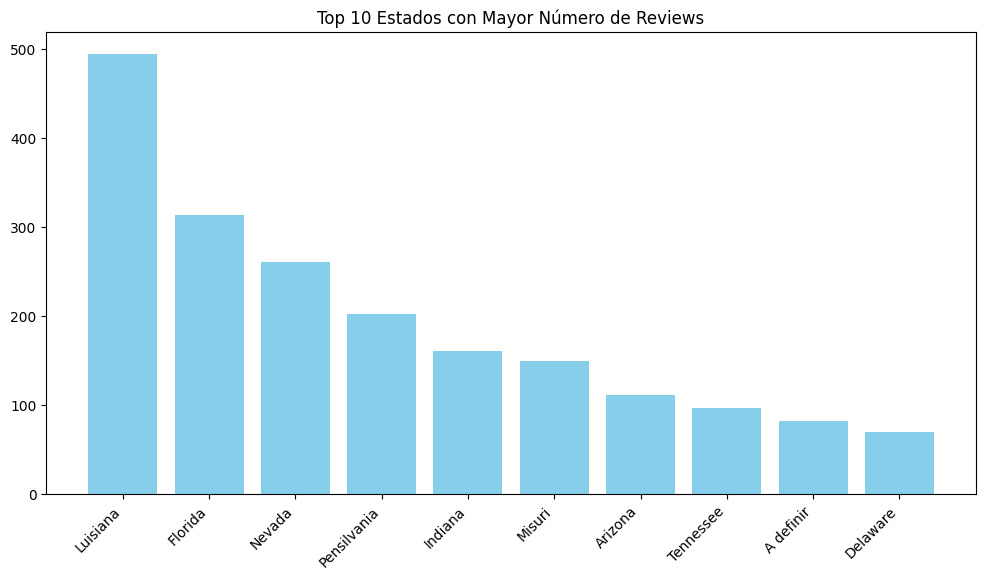

In [43]:
# Contar las filas por estado utilizando groupby y size
df_count_by_state = Y_ulta_beauty.groupby('state').size().reset_index(name='count')

# Crear un diccionario de mapeo entre 'state' y 'state_name' en G_ulta_beauty
state_mapping = Y_ulta_beauty.set_index('state')['state_name'].to_dict()

# Agregar la columna 'state_name' a df_count_by_state utilizando map
df_count_by_state['state_name'] = df_count_by_state['state'].map(state_mapping)

# Ordenar el DataFrame por el número de filas en orden descendente
df_count_by_state = df_count_by_state.sort_values(by='count', ascending=False)

# Seleccionar solo el top 10
df_top10_by_state = df_count_by_state.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_top10_by_state['state_name'], df_top10_by_state['count'], color='skyblue')

# Añadir etiquetas y título
plt.title('Top 10 Estados con Mayor Número de Reviews')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [ ]:
#columnas google = categories , name , adres , latitud, ,longitud ,  

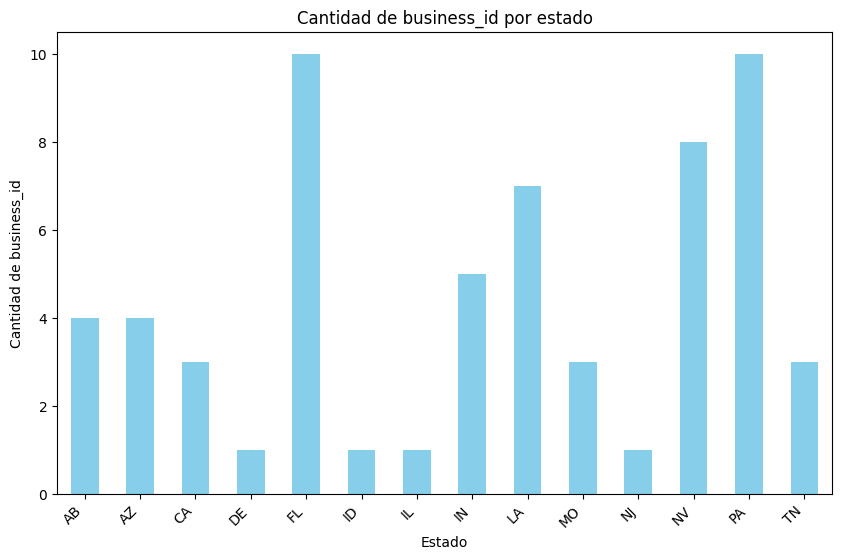

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por estado y contar la cantidad de business_id únicos
business_count_by_state = df_ulta_beauty.groupby('state')['business_id'].nunique()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
business_count_by_state.plot(kind='bar', color='skyblue')
plt.title('Cantidad de business_id por estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de business_id')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


Cambiamos los nombres de la nomenclatura por el nombre del estado

In [ ]:
dfreviews_ulta_beauty_conteo=dfreviews_ulta_beauty.groupby(['año','stars']).count()
dfreviews_ulta_beauty_conteo.to_csv('../datasets/csv/Y_rating_count_ulta_beauty.csv')
dfreviews_ulta_beauty_conteo

In [ ]:
dfreviews_ulta_beauty_conteo.set_index(['año','stars'],inplace=True)

In [ ]:
dfreviews_ulta_beauty.groupby(['año','stars']).size()

NameError: name 'dfreviews_ulta_beauty' is not defined

In [ ]:
grafica_stars_yelp=dfreviews_ulta_beauty_conteo['review_id'].reset_index(level='stars')

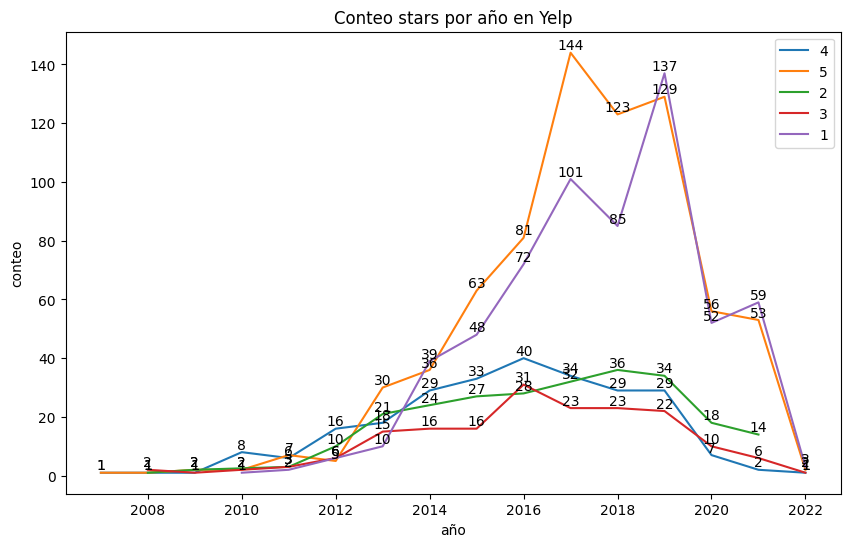

In [ ]:
plt.figure(figsize=(10, 6))

for a in grafica_stars_yelp['stars'].unique():
    data = grafica_stars_yelp[grafica_stars_yelp['stars'] == a]
    data['review_id'].plot()

    for index, value in data['review_id'].items():
        plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Conteo stars por año en Yelp')
plt.xlabel('año')
plt.ylabel('conteo')
plt.legend(['4','5','2','3','1'])
plt.show()


In [ ]:
grafica_rating_conteo_google=pd.read_csv(r'..\datasets\csv\G_stars_count_ultabeauty.csv')
grafica_rating_conteo_google.head(5)
grafica_rating_conteo_google=grafica_rating_conteo_google.set_index(grafica_rating_conteo_google.año).drop(columns='año')
grafica_rating_conteo_google.head()

,rating,name
año,,
2011,1,1
2011,5,2
2013,1,1
2013,2,2
2013,5,1


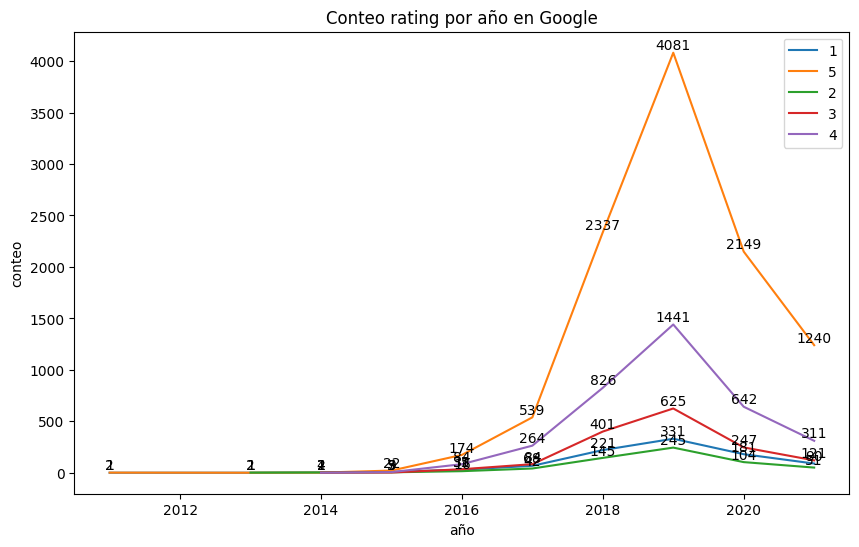

In [ ]:
plt.figure(figsize=(10, 6))

for a in grafica_rating_conteo_google['rating'].unique():
    data = grafica_rating_conteo_google[grafica_rating_conteo_google['rating'] == a]
    data['name'].plot()

    for index, value in data['name'].items():
        plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Conteo rating por año en Google')
plt.xlabel('año')
plt.ylabel('conteo')
plt.legend([1,5,2,3,4])
plt.show()

In [ ]:
dfreviews_ulta_beauty.groupby(['año','stars'])['stars'].mean().to_csv('../datasets/csv/Y_stars_mean_utlrabeauty.csv')